In [ ]:
# Instalar librerías necesarias
!pip install google-cloud-bigquery pandas-gbq matplotlib --quiet

In [ ]:
# Autenticar con tu cuenta de Google
from google.colab import auth
auth.authenticate_user()

# Configurar el proyecto de Google Cloud
from google.cloud import bigquery
from google.cloud.bigquery import Client

# Especifica tu ID de proyecto
PROJECT_ID = "river-module-448717-i9"  # Cambia esto por el ID de tu proyecto
client = bigquery.Client(project=PROJECT_ID)

In [ ]:
# Configurar el cliente de BigQuery
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Definición de la función para ejecutar consultas SQL
def run_query(sql_query):
    """
    Ejecuta una consulta SQL en BigQuery y devuelve los resultados como un DataFrame de Pandas.
    """
    query_job = client.query(sql_query)  # Ejecutar consulta
    results = query_job.result()  # Obtener resultados
    return results.to_dataframe()  # Convertir a DataFrame

# Consulta 1: Top 10 productos con mayor descuento
query_1 = """
SELECT product_name,
       CAST(REPLACE(CAST(discount_percentage AS STRING), '%', '') AS FLOAT64) AS discount_value
FROM `river-module-448717-i9.amazon_sales_data.sales_data`
WHERE SAFE_CAST(REPLACE(CAST(discount_percentage AS STRING), '%', '') AS FLOAT64) IS NOT NULL
ORDER BY discount_value DESC
LIMIT 10;
"""

# Consulta 2: Categorías con el mayor número de productos
query_2 = """
SELECT category, COUNT(*) AS total_products
FROM `river-module-448717-i9.amazon_sales_data.sales_data`
GROUP BY category
ORDER BY total_products DESC;
"""

# Consulta 3: Promedio de calificación por categoría
query_3 = """
SELECT category,
       AVG(SAFE_CAST(rating AS FLOAT64)) AS avg_rating
FROM `river-module-448717-i9.amazon_sales_data.sales_data`
WHERE SAFE_CAST(rating AS FLOAT64) IS NOT NULL
GROUP BY category
ORDER BY avg_rating DESC;
"""

# Consulta 4: Productos mejor calificados con más de 10,000 calificaciones
query_4 = """
SELECT product_name,
       SAFE_CAST(rating AS FLOAT64) AS rating_value,
       SAFE_CAST(REPLACE(CAST(rating_count AS STRING), ',', '') AS INT64) AS total_ratings
FROM `river-module-448717-i9.amazon_sales_data.sales_data`
WHERE SAFE_CAST(REPLACE(CAST(rating_count AS STRING), ',', '') AS INT64) > 10000
ORDER BY rating_value DESC
LIMIT 10;
"""

# Ejecutar las consultas
result_1 = run_query(query_1)
result_2 = run_query(query_2)
result_3 = run_query(query_3)
result_4 = run_query(query_4)

# Mostrar resultados
print("Top 10 Productos con Mayor Descuento:")
print(result_1)

print("\nCategorías con Mayor Número de Productos:")
print(result_2)

print("\nPromedio de Calificación por Categoría:")
print(result_3)

print("\nProductos Mejor Calificados con Más de 10,000 Calificaciones:")
print(result_4)

Top 10 Productos con Mayor Descuento:
                                        product_name  discount_value
0  rts [2 Pack] Mini USB C Type C Adapter Plug, T...            0.94
1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            0.91
2  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            0.91
3  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            0.91
4  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            0.91
5  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            0.91
6  Silicone Rubber Earbuds Tips, Eartips, Earpads...            0.90
7  beatXP Kitchen Scale Multipurpose Portable Ele...            0.90
8  Sounce Protective Case Cover Compatible Boat X...            0.90
9  LAPSTER 12pcs Spiral Cable Protectors for Char...            0.90

Categorías con Mayor Número de Productos:
                                              category  total_products
0    Computers&Accessories|Accessories&Peripherals|...             233
1          Electro

<ipython-input-5-25afdc966439>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

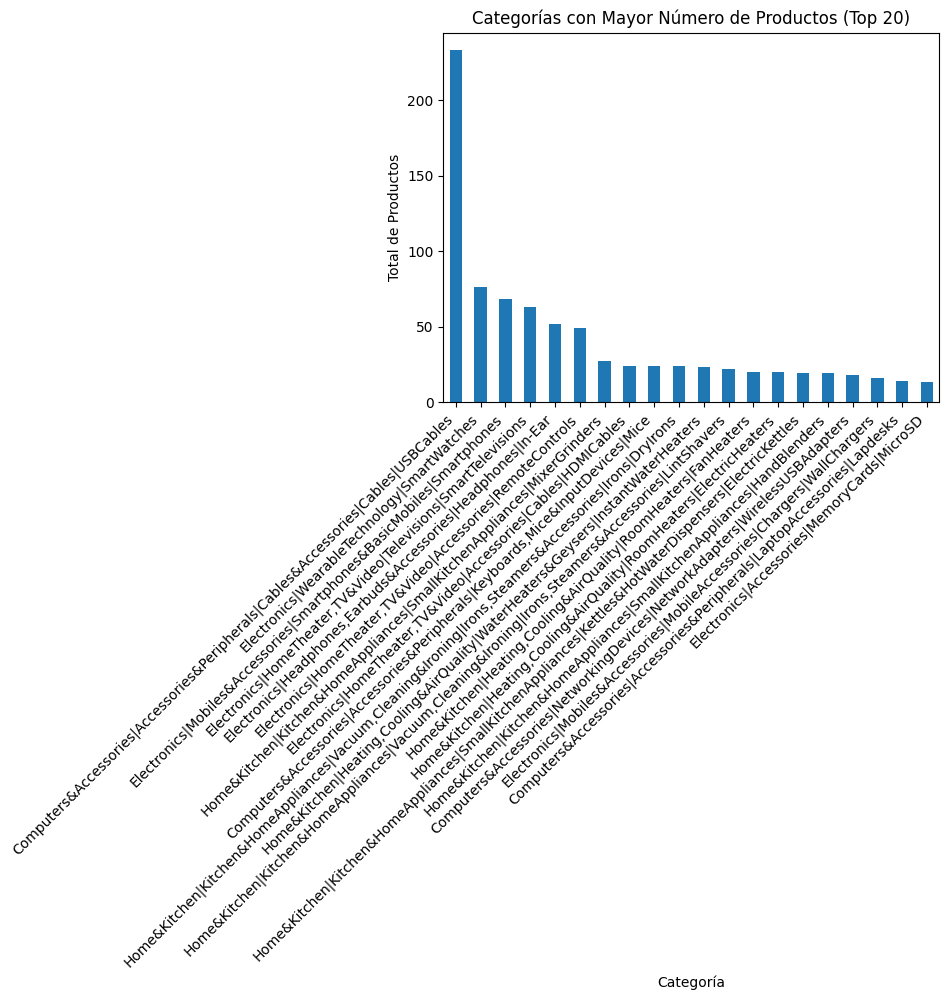

In [ ]:
# Limitar a las 20 categorías principales
top_categories = result_2.sort_values(by='total_products', ascending=False).head(20)

# Visualizar las categorías principales
plt.figure(figsize=(12, 8))
top_categories.plot(kind='bar', x='category', y='total_products', legend=False)
plt.title('Categorías con Mayor Número de Productos (Top 20)')
plt.ylabel('Total de Productos')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.tight_layout()
plt.show()

In [ ]:
def run_query(sql_query):
    """
    Ejecuta una consulta SQL en BigQuery y devuelve los resultados como un DataFrame.
    """
    query_job = client.query(sql_query)
    results = query_job.result()  # Ejecutar consulta
    return results.to_dataframe()  # Convertir a DataFrame


In [ ]:
query = """
SELECT product_name,
       CAST(REPLACE(CAST(discount_percentage AS STRING), '%', '') AS FLOAT64) AS discount_value
FROM `river-module-448717-i9.amazon_sales_data.sales_data`
ORDER BY discount_value DESC
LIMIT 10;
"""

# Recuperar datos relevantes
retrieved_data = run_query(query)

# Convertir los datos a un formato legible para el modelo
context_data = retrieved_data.to_string(index=False)
print("Datos Recuperados de BigQuery:\n", context_data)


Datos Recuperados de BigQuery:
                                                                                                                                                                                     product_name  discount_value
rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver            0.94
                                       Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution            0.91
                                       Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution            0.91
                                       Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance,

In [ ]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 63.3 MB/s eta 0:00:00


In [ ]:
from google.cloud import bigquery

# Configurar cliente de BigQuery
client = bigquery.Client(project="river-module-448717-i9")

# Definir consulta general para obtener datos
query = """
SELECT product_name, category, discounted_price, actual_price, discount_percentage, rating, about_product
FROM `river-module-448717-i9.amazon_sales_data.sales_data`
"""
query_job = client.query(query)
data = query_job.result().to_dataframe()

# Ver las primeras filas
data.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,about_product
0,Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...,Electronics|WearableTechnology|SmartWatches,899.0,3499.0,0.74,3.0,【Bluetooth Calling Watch】- Tokdis MX-1 Pro ena...
1,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,281.0,1999.0,0.86,2.8,"✅ All-day activity tracking: Track steps, dist..."
2,7SEVEN Compatible LG TV Remote Suitable for LG...,"Electronics|HomeTheater,TV&Video|Accessories|R...",790.0,1999.0,0.60,3.0,for LG TV series All Models of Remote Control ...
3,LRIPL Mi Remote Control with Netflix & Prime V...,"Electronics|HomeTheater,TV&Video|Accessories|R...",655.0,1099.0,0.40,3.2,This Voice Command Compatible Remote is for Mi...
4,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,0.44,4.7,Resolution: 4K Ultra HD (3840 x 2160) | Refres...


In [ ]:
# Importando las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mostrando las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(data.head(5))

Primeras 5 filas del dataset:
                                        product_name  \
0  Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...   
1  SHREENOVA ID116 Plus Bluetooth Fitness Smart W...   
2  7SEVEN Compatible LG TV Remote Suitable for LG...   
3  LRIPL Mi Remote Control with Netflix & Prime V...   
4  Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...   

                                            category  discounted_price  \
0        Electronics|WearableTechnology|SmartWatches             899.0   
1        Electronics|WearableTechnology|SmartWatches             281.0   
2  Electronics|HomeTheater,TV&Video|Accessories|R...             790.0   
3  Electronics|HomeTheater,TV&Video|Accessories|R...             655.0   
4  Electronics|HomeTheater,TV&Video|Televisions|S...           77990.0   

   actual_price  discount_percentage rating  \
0        3499.0                 0.74    3.0   
1        1999.0                 0.86    2.8   
2        1999.0                 0.60    3.0   


In [ ]:
# Verificando la forma del dataset
print("\nForma del dataset (filas, columnas):", data.shape)


Forma del dataset (filas, columnas): (1465, 7)


In [ ]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico:")
print(data.describe())


Resumen estadístico:
       discounted_price   actual_price  discount_percentage
count       1465.000000    1465.000000          1465.000000
mean        3125.310874    5444.990635             0.476915
std         6944.304394   10874.826864             0.216359
min           39.000000      39.000000             0.000000
25%          325.000000     800.000000             0.320000
50%          799.000000    1650.000000             0.500000
75%         1999.000000    4295.000000             0.630000
max        77990.000000  139900.000000             0.940000


In [ ]:
# Comprobando valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Valores faltantes por columna:
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
dtype: int64


In [ ]:
# Verificando los tipos de datos
print("\nTipos de datos por columna:")
print(data.dtypes)


Tipos de datos por columna:
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                  object
about_product           object
dtype: object


In [ ]:
# Contando valores únicos en las columnas categóricas
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nValores únicos en columnas categóricas:")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} valores únicos")


Valores únicos en columnas categóricas:
product_name: 1337 valores únicos
category: 211 valores únicos
rating: 28 valores únicos
about_product: 1293 valores únicos


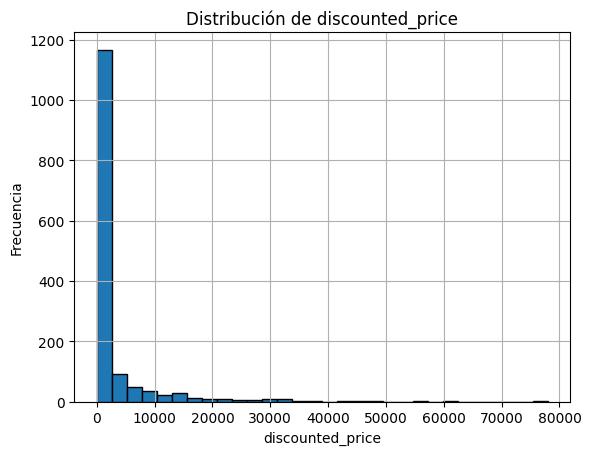

In [ ]:
# Graficando la distribución de una columna numérica
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
if not numerical_cols.empty:
    data[numerical_cols[0]].hist(bins=30, edgecolor='k')
    plt.title(f"Distribución de {numerical_cols[0]}")
    plt.xlabel(numerical_cols[0])
    plt.ylabel("Frecuencia")
    plt.show()

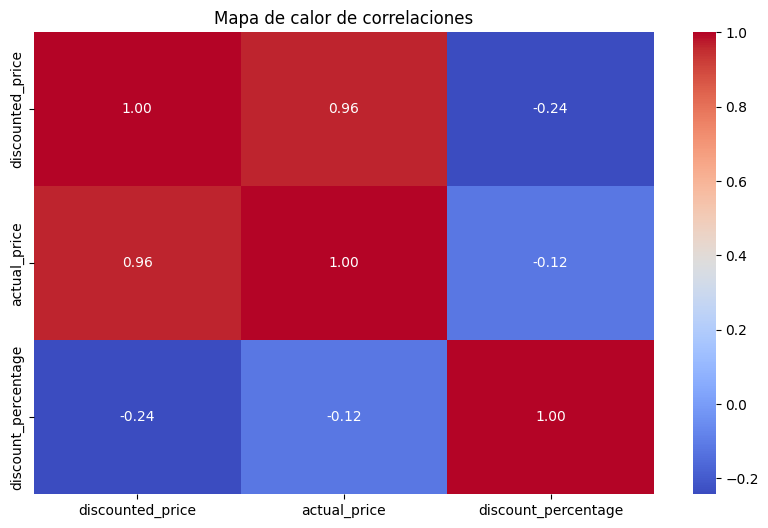

In [ ]:
# Mapa de calor de correlaciones
plt.figure(figsize=(10, 6))
# Correlación
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

In [ ]:
# Verificando duplicados
duplicates = data.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicates}")


Número de filas duplicadas: 114
